## EDA GOOGLE REVIEWS
A continuación vamos a realizar el EDA de la base de datos que generamos previamente y con el estado ya seleccionado en el alcance del proyecto y con los análisis preeliminares.  
Vamos a comenzar analizando la estructura de la base de datos, realizando una limpieza de duplicados, analizando los nulos y que información tiene cada columna.

In [53]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [54]:
df = pd.read_parquet('C:/Users/Mariano/Desktop/Soy Henry/Proyecto Final/Bases_de_datos/Google Maps/reviews-estados/data/review-Florida.parquet')

In [55]:
df.head(5)

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year
0,101471856155148729010,Julie A. Gerber,2021-08-03 15:07:30.740,1,Update: Their “reply” to my review amounted to...,None,{'text': 'Thank you for the feedback. We would...,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2021
1,115477234789038326051,Martin Sheffield,2020-07-18 00:13:37.005,5,He's a knowledgeable doctor but the way he run...,None,{'text': 'Thank you for reaching out. I’m forw...,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2020
2,101805010244892834381,Brian Truett,2018-04-05 10:30:53.567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2018
3,106344422881493743981,Tina Sun,2016-07-07 16:10:19.586,1,I was told he is a good doctor. I was trying t...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2016
4,100875113069561776529,James Haynes,2016-12-02 12:56:55.081,5,Takes the time to actually get to know his pat...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2016


A partir del archivo de base de locales, traemos la categoría para así poder trabajar solamente con los locales de las categorías en las que estamos interesados.  
Lo haremos mediante un left inner join.

In [56]:
df2 = pd.read_parquet('C:/Users/Mariano/Desktop/Soy Henry/Proyecto Final/Bases_de_datos/data_filtrada.parquet')
df2.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,state
0,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,Restaurant,4.5,18,California
1,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,Restaurant,4.0,8,New Jersey
2,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,Restaurant,4.4,18,Hawaii
3,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,Restaurant,5.0,1,Florida
4,Golden Castle,"Golden Castle, 1906 E 12th St, Austin, TX 78702",0x8644b59b8fe872e5:0x5e638876caa84cc3,30.273985,-97.719563,Restaurant,4.5,8,Texas


In [57]:
df = df.merge(df2[['gmap_id', 'category']], on='gmap_id', how='left')

In [58]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,state,year,category
0,101471856155148729010,Julie A. Gerber,2021-08-03 15:07:30.740,1,Update: Their “reply” to my review amounted to...,None,{'text': 'Thank you for the feedback. We would...,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2021,NaN
1,115477234789038326051,Martin Sheffield,2020-07-18 00:13:37.005,5,He's a knowledgeable doctor but the way he run...,None,{'text': 'Thank you for reaching out. I’m forw...,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2020,NaN
2,101805010244892834381,Brian Truett,2018-04-05 10:30:53.567,5,"Best doctor I've ever had, I never wait to be ...",None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2018,NaN
3,106344422881493743981,Tina Sun,2016-07-07 16:10:19.586,1,I was told he is a good doctor. I was trying t...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2016,NaN
4,100875113069561776529,James Haynes,2016-12-02 12:56:55.081,5,Takes the time to actually get to know his pat...,None,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,Florida,2016,NaN


In [59]:
df['category'].unique()

array([nan, 'Restaurant'], dtype=object)

Como vemos, solo tenemos  categorías restaurants y eliminaremos los registros restantes ya que no aportan información y nos permitirá trabajar mejor con la base de datos.

In [60]:
df = df[df['category'] == 'Restaurant']

A continuación analizamos más en detalle las 2 columnas con texto. Aparentemente la columna text es una reseña que dejan los clientes, y está con formato texto.  
Por otro lado la columna resp es la respuesta del local a los comentarios del cliente. Esta columna está como un diccionario con 2 keys, la primera es el texto y la segunda es la fecha de la respuesta. Vamos a proceder a dividir esta columna en 2 para poder analizarla posteriormente y trabajar el dataframe sin complicaciones.

In [61]:
df[['Texto_respuesta', 'Fecha_respuesta']] = df['resp'].apply(pd.Series)
df = df.drop(columns=['resp'],axis=1)

### Nulos
A continuación, pasamos a analizar los nulos que tenemos por columna tanto en cantidad como en portentaje.

In [62]:
Nulos = pd.DataFrame({'Registros':len(df),'Nulos': df.isna().sum(),'% de Nulos': 100*df.isna().sum()/len(df)})
Nulos

,Registros,Nulos,% de Nulos
user_id,24444,0,0.000000
name,24444,0,0.000000
time,24444,0,0.000000
rating,24444,0,0.000000
text,24444,7301,29.868270
pics,24444,22153,90.627557
gmap_id,24444,0,0.000000
state,24444,0,0.000000
year,24444,0,0.000000
category,24444,0,0.000000


Como vemos, el 90 % de los registros de pics son nulos y no es informaión que utilizaremos. Por esto procedemos a eliminar dicha columna y a continuación procedemos a eliminar duplicados

In [63]:
df = df.drop(columns=['pics'],axis=1)

In [64]:
df=df.drop_duplicates()

In [65]:
df2.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,state
0,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,Restaurant,4.5,18,California
1,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,Restaurant,4.0,8,New Jersey
2,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,Restaurant,4.4,18,Hawaii


### Análisis vs Google Sitios

In [66]:
len(df['gmap_id'].unique())

754

In [67]:
len(df2[df2['state']=='Florida']['gmap_id'].unique())

2474

Comparando la cantidad de registros únicos entre los 2 datasets distintos, vemos que de 2474 restaurants, solo 751 tienen reviews

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34542 entries, 0 to 34541
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            34542 non-null  object 
 1   address         34542 non-null  object 
 2   gmap_id         34542 non-null  object 
 3   latitude        34542 non-null  float64
 4   longitude       34542 non-null  float64
 5   category        34542 non-null  object 
 6   avg_rating      34542 non-null  float64
 7   num_of_reviews  34542 non-null  int64  
 8   state           34542 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.4+ MB


### Análisis de ratings
Como podemos ver con los análisis a continuación, vemos que la media de ratings es de 4.4

In [69]:
df['rating'].describe()

count    23729.000000
mean         4.402335
std          1.094604
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

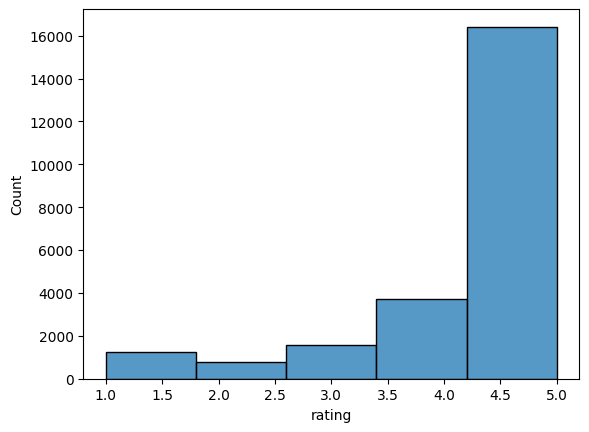

In [70]:
sns.histplot(df['rating'], bins=5)  # kde=True agrega una estimación de la densidad


### Análisis de reviews anual

C:\Users\Mariano\AppData\Local\Temp\ipykernel_3792\221598421.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year',y='rating',data = df,ci=None)


<Axes: xlabel='year', ylabel='rating'>

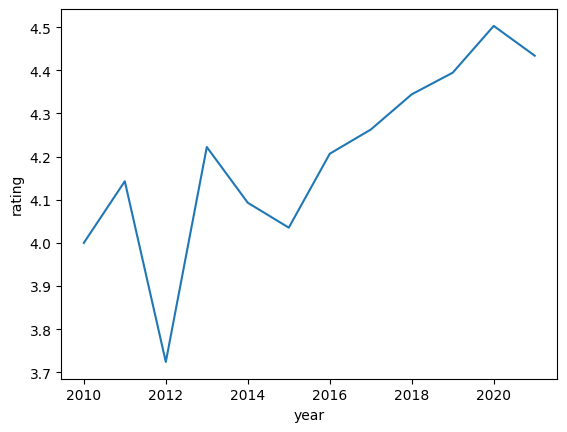

In [71]:
sns.lineplot(x='year',y='rating',data = df,ci=None)

<Axes: xlabel='year', ylabel='Count'>

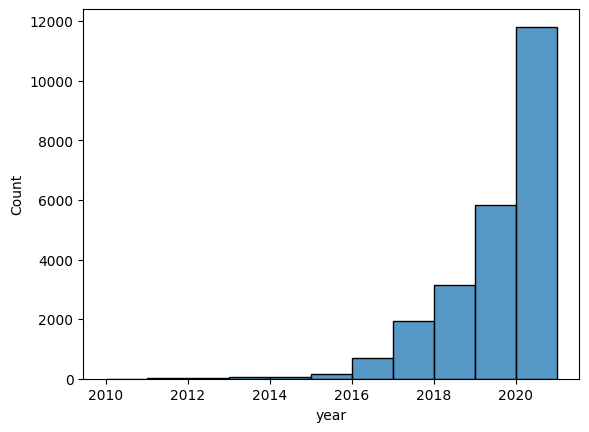

In [72]:
sns.histplot(df['year'], bins=11)  # kde=True agrega una estimación de la densidad

In [73]:
df['year'].value_counts()

year
2021    6371
2019    5812
2020    5439
2018    3154
2017    1934
2016     692
2015     170
2013      54
2014      43
2012      29
2011      28
2010       3
Name: count, dtype: int64

Podemos ver como la puntuación fue subiendo año a año, y como la cantidad de puntuaciones fue creciendo exponencialmente desde el 2015 en adelante, por lo que podríamos optar por trabajar con infromación de este año en adelante.

In [74]:
df = df[df['year']>2014]

### Análisis de reviews por categoría

<Axes: xlabel='month', ylabel='rating'>

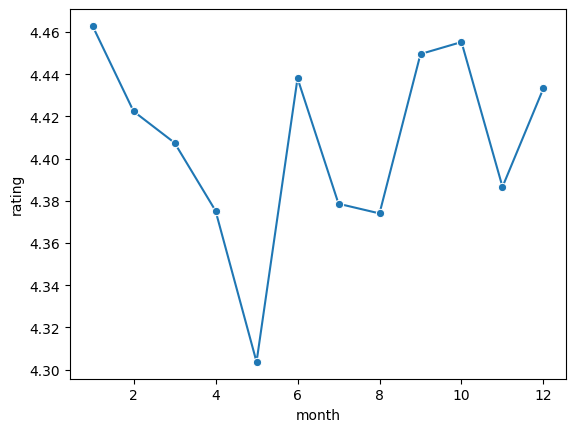

In [75]:
df['month'] = df['time'].dt.month


media_mensual = df.groupby([ 'month'])['rating'].mean().reset_index()



sns.lineplot(x='month', y='rating', data=media_mensual, marker='o')


In [76]:
df['time'].max()

Timestamp('2021-09-07 21:31:17.761000')